<h1>Logistic Regression</h1>

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one. This makes it a binary classifier.

$\hat p = h_\beta(x) = σ (x^Tθ)$

Where:

$\hat p$ is the probability that an instance $x$ belongs to a given class

$\sigma$ is a logistic function given by:
$σ(t) = \frac{1}{1 + exp(−t)}$ that ranges from 0 to 1

The prediction of the logistic regression model is an indicator function ( $\mathbb{1} p \geq 0.5$):

$\hat y = {{ 0 \;\; if \;\;p < 0.5} \\{ 1 \;\;if \;\;p ≥ 0.5}}$

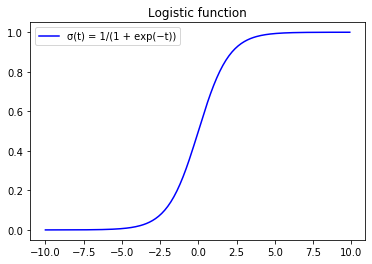

In [70]:
import numpy as np

import matplotlib.pyplot as plt

t = np.arange(-10, 10,.1)
sigma=1/(1+np.exp(-t))
plt.title("Logistic function")
plt.plot(t,sigma,color="blue",label="σ(t) = 1/(1 + exp(−t))")
plt.legend()
plt.show()

<b>Cost function:</b>

$J(\beta) = −\frac {1}{m}Σ_{i = 1}^m [y^{(i)} log (\hat p^{(i)}) + (1 − y^{(i)}) log ( 1 − \hat p^{(i)})$

The bad news is that there is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal Equation). But the good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough). 

The partial derivatives of the cost function with regards to the $j^{th}$ model parameter $θ_j$ is given by:

$\frac {∂}{∂ \beta_j} J(\beta) = \frac {1}{m}Σ_{i = 1}^m(σ( \beta^Tx^{(i)}) − y^{(i)}) x_j^{(i)}$

<h2>Decision Boundaries</h2>

We are ging to use the iris dataset contains the 50 samples of 3 different species of iris to analyse the logistic regression, it contains:<br>
- Measurements: sepal length, sepal width, petal length, petal width<br>
- The format for the data: (sepal length, sepal width, petal length, petal width)

The target contains a number that defines the specie of iris: (0-'setosa', 1-'versicolor', 2-'virginica')

<h3>Using 1 feature</h3>

The first example will try to predict by using the petal width if it is iris virginica:

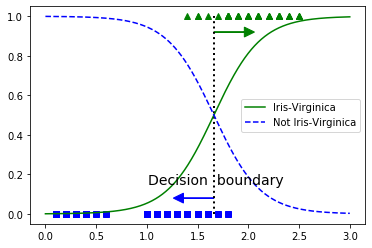

In [78]:
from sklearn import datasets
iris = datasets.load_iris()
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2)
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, 1-y_proba[:, 1], "g-", label="Not Iris-Virginica", color="blue",linestyle='dashed')
plt.legend()
plt.show()

In [54]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

<h3>Using 2 features</h3>

Now the goal is to predict if it is iris virginica using two features: petal length and petal width

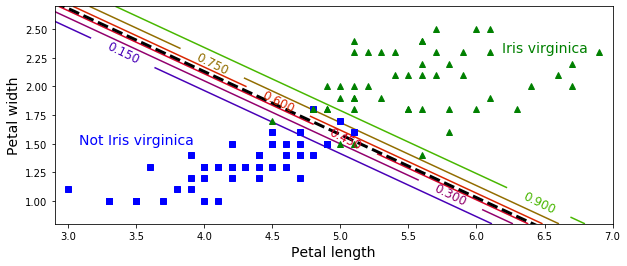

In [67]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

<h2>Softmax Regression</h2>

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression. The idea is quite simple: when given an instance x, the Softmax Regression model first computes a score sk(x) for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute sk(x) should look familiar, as it is just like the equation for Linear Regression prediction.

The equation for Softmax score for class k is given by:

$s_k( x ) = x^T\beta^{(k)}$

Note that each class has its own dedicated parameter vector $θ(k)$. All these vectors are typically stored as rows in a parameter matrix $Θ$.

Once you have computed the score of every class for the instance x, you can estimate the probability $p_k$ that the instance belongs to class $k$ by running the scores through the softmax function it computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called logits or log-odds (although they are actually unnormalized logodds).

Softmax function

$pk = σ( (s( x))_k =\frac {exp (s_k( x))}{Σ_{j = 1}^K exp( s_j (x))}$

Whe$r$e:
• $K$ is the number of classes.
• $s(x)$ is a vector containing the scores of each class for the instance $x$.
• $σ(s(x))_k$ is the estimated probability that the instance $x$ belongs to class $k$ given the scores of each class for that instance.
Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).
Equation 4-21. Softmax Regression classifier prediction
$\hat y = argmax_k σ(s(x))_k = argmax_k s_k(x) = argmax_k((θ^{(k)})^Tx)$

The argmax operator returns the value of a variable that maximizes a function. In this equation, it returns the value of $k$ that maximizes the estimated probability
$σ(s(x))_k$.

⚠️The Softmax Regression classifier predicts only one class at a time
(i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture.

<h3>Cross entropy</h3>

The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function shown in Equation 4-22, called the cross entropy, should lead to this objective because it penalizes the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes.

Cross entropy cost function

$J(Θ) = − \frac {1}{m}Σ_{i = 1}^m Σ_{k = 1}{K} y_k^{(i)} log( \hat p_k^{(i)})$

Where $y_k^{(i)}$ is the target probability that the ith instance belongs to class $k$. In general, it is
either equal to 1 or 0, depending on whether the instance belongs to the class or not.

The gradient vector of this cost function with regards to θ(k) is given by the equation:

$∇ _{θ ^(k)} J( Θ) = \frac{1}{m}Σ_{i = 1}^m(\hat p_k^{(i)} − y_k{(i)}x^{(i)}$

Now you can compute the gradient vector for every class, then use Gradient Descent (or any other optimization algorithm) to find the parameter matrix Θ that minimizes the cost function.

<h3>Using 2 features to analyse probability of belonging to each class</h3>

Now the gola is to predict if it is iris virginica using two features: petal length and petal width

In [123]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
import pandas as pd
softmax_reg.predict([[5, 2]])
prob=softmax_reg.predict_proba([[5, 2]])
print("The probability(%) for each class is: ")
df=pd.DataFrame(prob*100,columns=iris["target_names"])
df.style.hide_index()
df

The probability(%) for each class is: 


,setosa,versicolor,virginica
0,0.000064,5.7493,94.250636


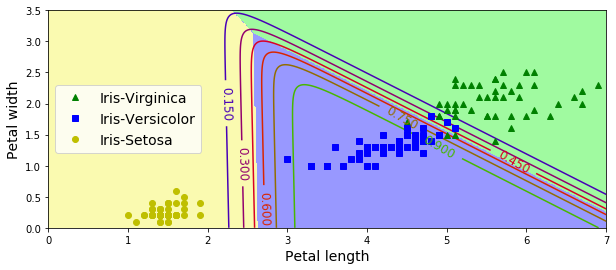

In [126]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()